# Regresión con Datos Atipicos: 


# 

## 1. Librerías y Datos

In [4]:
#!pip install regressors==0.0.3

In [1]:
#manipulación de datos
import numpy as np
import pandas as pd
#visualización
import seaborn as sns
import matplotlib.pyplot as plt
#preprocesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
#Regresión
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#metricas y analisis del modelo
import sklearn.metrics as metrics
import regressors
from regressors import stats


In [3]:
df = pd.read_csv(r'datasets\felicidad.csv')
df.head()

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


## 2. Analizar Datos

In [7]:

# https://www.kaggle.com/datasets/unsdsn/world-happiness 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     155 non-null    object 
 1   rank        155 non-null    int64  
 2   score       155 non-null    float64
 3   high        155 non-null    float64
 4   low         155 non-null    float64
 5   gdp         155 non-null    float64
 6   family      155 non-null    float64
 7   lifexp      155 non-null    float64
 8   freedom     155 non-null    float64
 9   generosity  155 non-null    float64
 10  corruption  155 non-null    float64
 11  dystopia    155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.7+ KB


In [7]:
df.describe()

,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [8]:
# incluir sesgo y kurtosis en describe
df.score.skew()


0.009553789762120705

In [9]:
# kurtois
df.score.kurtosis()
# kurtois > 0, la distribución es más puntiaguda que la distribución normal

-0.7504186571684914

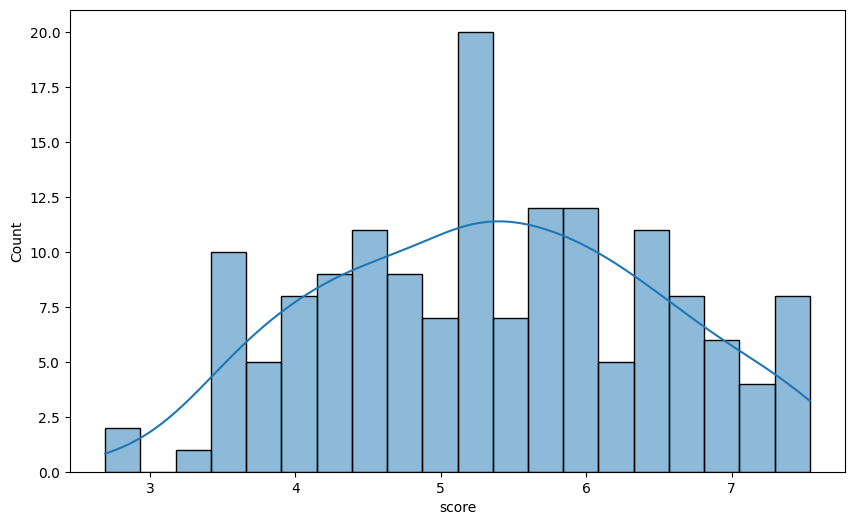

In [11]:
# plot histograma de la variable score con 20 bins
plt.figure(figsize=(10, 6))

sns.histplot(df.score, kde=True, bins=20)
plt.show()


NO siempre es bueno eliminar outliers sin antes consultar con un experto en el tema.

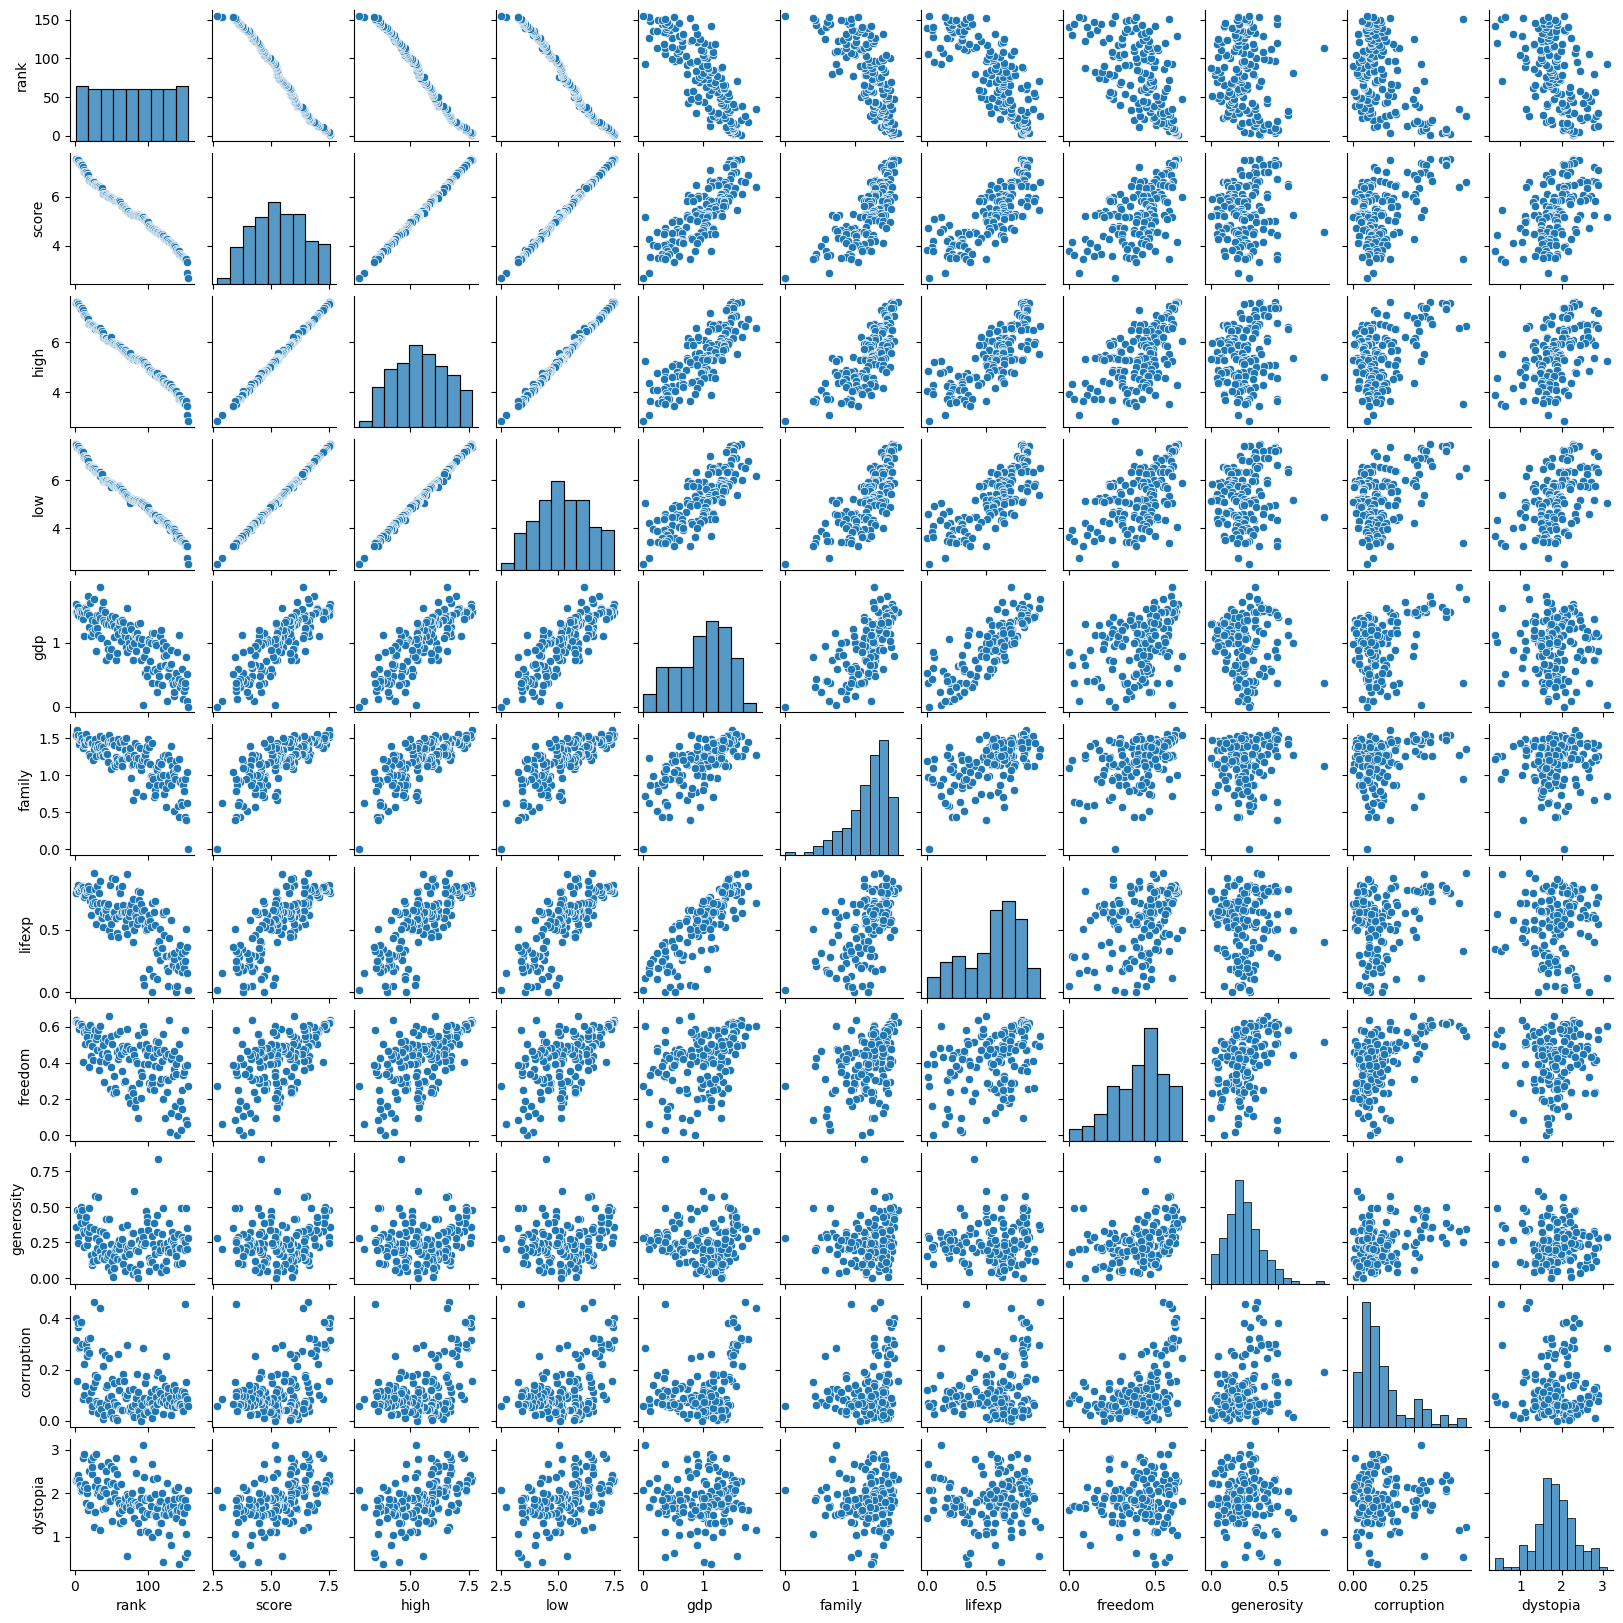

In [13]:
sns.pairplot(df, height=1.5)
plt.show()

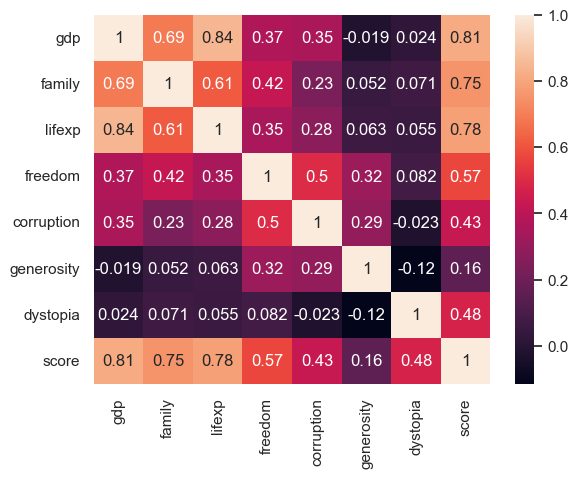

In [16]:
numeric_cols = ['gdp', 'family', 'lifexp', 'freedom' , 'corruption' , 'generosity', 'dystopia','score']
cm = np.corrcoef(df[numeric_cols].values.T)
sns.set_theme(font_scale=1)
sns.heatmap(cm,annot=True, yticklabels=numeric_cols,xticklabels=numeric_cols)
plt.show()

# Preproccesing

Dentros del Preprocesamiento de los datos se debe de asegurar:

- Eliminar duplicados
- Evaluar nulos
- Remover columnas innecesarias(codigo, id, etc)
- Remover outliers
- Normalizar  o Estandarizar o Escalar los datos
- Crear variables dummy
- Crear variables polinomiales

In [19]:
# separar en X y Y
df_train = df.copy()
X_cols = ['gdp', 'family', 'lifexp', 'freedom' , 'corruption' , 'generosity', 'dystopia']
y_col = ['score']
X = df_train[X_cols].values
y = df_train[y_col].values



In [20]:
# StandardScaler
y_scaler = StandardScaler()
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y)


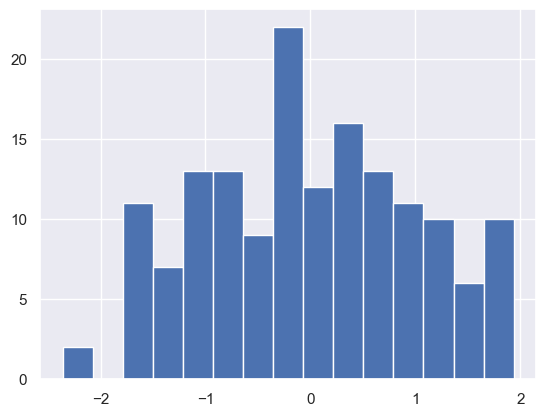

In [24]:
# y_scaled hist
plt.hist(y_scaled, bins = 15)
plt.show()

In [25]:
# y_scaled describe
y_scaled = pd.DataFrame(y_scaled, columns = y_col)
y_scaled.describe()

,score
count,1.550000e+02
mean,-5.500976e-16
std,1.003241e+00
min,-2.359949e+00
25%,-7.525169e-01
50%,-6.653176e-02
75%,6.629099e-01
max,1.935996e+00


## Entrenar el modelos

In [27]:
# train test split
rs = 23
X_train_std,X_test_std,y_train_std,y_test_std= train_test_split(X_scaled,y_scaled,train_size=0.8, random_state=rs)

model_linear = LinearRegression()
model_linear.fit(X_train_std,y_train_std)
y_train_pred_linear = model_linear.predict(X_train_std)
y_test_pred_linear = model_linear.predict(X_test_std)
# Evaluación del modelo
print('Métricas del modelo de regresión lineal')
print('MSE train: ', metrics.mean_squared_error(y_train_std, y_train_pred_linear))
print('MSE test: ', metrics.mean_squared_error(y_test_std, y_test_pred_linear))

#ver pesos de las variables como una tabla
df_weights = pd.DataFrame(model_linear.coef_.T, index = X_cols, columns = ['weights'])
df_weights.loc['intercept'] = model_linear.intercept_
df_weights




Métricas del modelo de regresión lineal
MSE train:  6.277047526194252e-08
MSE test:  5.5387917544506616e-08


,weights
gdp,0.372016
family,0.253922
lifexp,0.209546
freedom,0.132613
corruption,0.089846
generosity,0.119163
dystopia,0.441997
intercept,-0.000003


In [31]:
# Ridge
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(X_train_std,y_train_std)
y_train_pred_ridge = model_ridge.predict(X_train_std)
y_test_pred_ridge = model_ridge.predict(X_test_std)
# Evaluación del modelo
print('Métricas del modelo de regresión Ridge')
print('MSE train: ', metrics.mean_squared_error(y_train_std, y_train_pred_ridge))
print('MSE test: ', metrics.mean_squared_error(y_test_std, y_test_pred_ridge))

# pesos de las variables
df_weights_ridge = pd.DataFrame(model_ridge.coef_.T, index = X_cols, columns = ['weights'])
df_weights_ridge.loc['intercept'] = model_ridge.intercept_
df_weights_ridge



Métricas del modelo de regresión Ridge
MSE train:  6.566720901611812e-06
MSE test:  4.331276606802541e-06


,weights
gdp,0.368750
family,0.253986
lifexp,0.211415
freedom,0.132969
corruption,0.090152
generosity,0.118124
dystopia,0.440242
intercept,0.000028


In [43]:
# lasso
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.5)
model_lasso.fit(X_train_std,y_train_std)
y_train_pred_lasso = model_lasso.predict(X_train_std)
y_test_pred_lasso = model_lasso.predict(X_test_std)
# Evaluación del modelo
print('Métricas del modelo de regresión Lasso')
print('MSE train: ', metrics.mean_squared_error(y_train_std, y_train_pred_lasso))
print('MSE test: ', metrics.mean_squared_error(y_test_std, y_test_pred_lasso))

# pesos de las variables
df_weights_lasso = pd.DataFrame(model_lasso.coef_, index = X_cols, columns = ['weights'])
df_weights_lasso.loc['intercept'] = model_lasso.intercept_
df_weights_lasso

Métricas del modelo de regresión Lasso
MSE train:  0.5610302199106303
MSE test:  0.4518629071340157


,weights
gdp,0.228581
family,0.077242
lifexp,0.046857
freedom,0.000000
corruption,0.000000
generosity,0.000000
dystopia,0.007683
intercept,-0.004698


In [42]:
# elasticnet
from sklearn.linear_model import ElasticNet
model_elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
model_elastic.fit(X_train_std,y_train_std)
y_train_pred_elastic = model_elastic.predict(X_train_std)
y_test_pred_elastic = model_elastic.predict(X_test_std)
# Evaluación del modelo
print('Métricas del modelo de regresión ElasticNet')
print('MSE train: ', metrics.mean_squared_error(y_train_std, y_train_pred_elastic))
print('MSE test: ', metrics.mean_squared_error(y_test_std, y_test_pred_elastic))

# pesos de las variables
df_weights_elastic = pd.DataFrame(model_elastic.coef_, index = X_cols, columns = ['weights'])
df_weights_elastic.loc['intercept'] = model_elastic.intercept_
df_weights_elastic

Métricas del modelo de regresión ElasticNet
MSE train:  0.01259514740676838
MSE test:  0.009881773869036893


,weights
gdp,0.323006
family,0.237037
lifexp,0.216097
freedom,0.130087
corruption,0.072308
generosity,0.061597
dystopia,0.375559
intercept,-0.000676


In [40]:
# comparar MSE en una tabla 
df_mse = pd.DataFrame({'linear': [metrics.mean_squared_error(y_train_std, y_train_pred_linear), metrics.mean_squared_error(y_test_std, y_test_pred_linear)],
                       'ridge': [metrics.mean_squared_error(y_train_std, y_train_pred_ridge), metrics.mean_squared_error(y_test_std, y_test_pred_ridge)],
                       'lasso': [metrics.mean_squared_error(y_train_std, y_train_pred_lasso), metrics.mean_squared_error(y_test_std, y_test_pred_lasso)],
                       'elastic': [metrics.mean_squared_error(y_train_std, y_train_pred_elastic), metrics.mean_squared_error(y_test_std, y_test_pred_elastic)]},
                      index = ['train', 'test'])
df_mse.T

,train,test
linear,6.277048e-08,5.538792e-08
ridge,6.566721e-06,4.331277e-06
lasso,8.397661e-03,7.228867e-03
elastic,3.279106e-03,2.559097e-03


## 3. Analizando el modelo

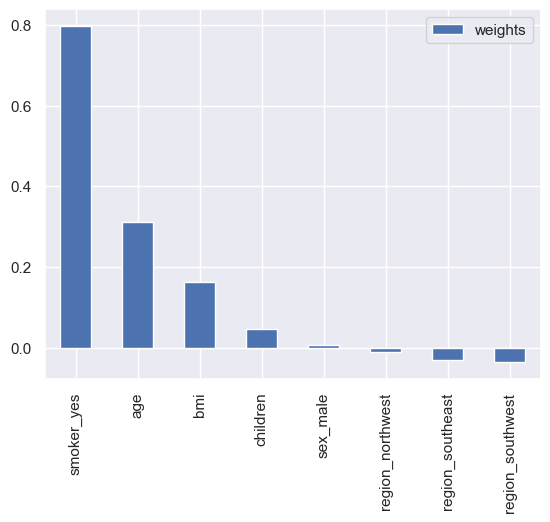

In [ ]:
# ver pesos de las variables y graficar
weights = model_1.coef_
weights = pd.DataFrame(weights, columns = X_cols)
weights = weights.T
weights.columns = ['weights']
weights = weights.sort_values(by = 'weights', ascending = False)
weights.plot(kind = 'bar')
plt.show()

In [ ]:
# intercepto
intercept = model_1.intercept_
print(intercept)


[-7.98678515e-05]


## 4. Evaluando el modelo

In [ ]:
y_predict = model_1.predict(X_train_std)

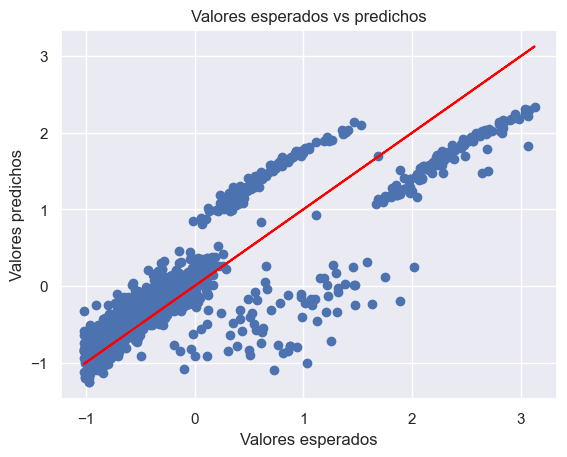

In [ ]:
# Comparar valores esperados vs predichos
plt.scatter(y_train_std, y_predict)
# graficar la recta y = x
plt.plot(y_train_std, y_train_std, color = 'red')

plt.xlabel('Valores esperados')
plt.ylabel('Valores predichos')
plt.title('Valores esperados vs predichos')
plt.show()



In [ ]:
# calcular metricas
mse = metrics.mean_squared_error(y_train_std,y_predict)
r2 = metrics.r2_score(y_train_std, y_predict)



print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.7564
mse:  0.2453


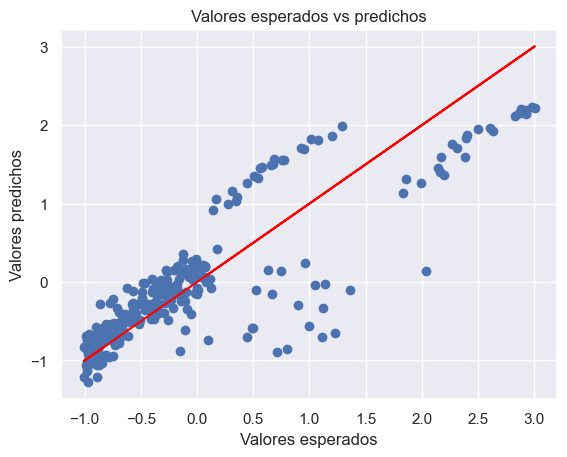

In [ ]:
# aplicar el modelo a test
y_predict_test = model_1.predict(X_test_std)

# ver graficamente
plt.scatter(y_test_std, y_predict_test)
# graficar la recta y = x
plt.plot(y_test_std, y_test_std, color = 'red')

plt.xlabel('Valores esperados')
plt.ylabel('Valores predichos')
plt.title('Valores esperados vs predichos')
plt.show()


In [ ]:
# calcular metricas
mse_test = metrics.mean_squared_error(y_test_std,y_predict_test)
r2_test = metrics.r2_score(y_test_std, y_predict_test)

print("r2_test ", r2_test.round(4))
print("mse_test: ", mse_test.round(4))


r2_test  0.7366
mse_test:  0.2555


In [ ]:
# crear función para evaluar el modelo
def evaluar_modelo(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mse_train = metrics.mean_squared_error(y_train,y_train_pred)
    r2_train = metrics.r2_score(y_train, y_train_pred)
    mse_test = metrics.mean_squared_error(y_test,y_test_pred)
    r2_test = metrics.r2_score(y_test, y_test_pred)
    return mse_train, r2_train, mse_test, r2_test

# función para ver los coeficientes
def ver_coeficientes(model, X):
    weights = model.coef_
    weights = pd.DataFrame(weights, columns = X.columns)
    weights = weights.T
    weights.columns = ['weights']
    weights = weights.sort_values(by = 'weights', ascending = False)
    weights.plot(kind = 'bar')
    plt.show()
    return weights

# función para ver los residuos
def ver_residuos(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    residuos_train = y_train - y_train_pred
    residuos_test = y_test - y_test_pred
    #plt.scatter(y_train_pred, residuos_train)
    plt.scatter(y_test_pred, residuos_test)
    plt.axhline(0, color = 'red')
    plt.show()
    return residuos_train, residuos_test

# función para ver la distribución de los residuos
def ver_distribucion_residuos(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    residuos_train = y_train - y_train_pred
    residuos_test = y_test - y_test_pred
    sns.histplot(residuos_train, kde = True)
    sns.histplot(residuos_test, kde = True)
    plt.show()
    return residuos_train, residuos_test
# función para ver predichos vs esperados
def ver_predichos_vs_esperados(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    #plt.scatter(y_train, y_train_pred)
    plt.scatter(y_test, y_test_pred)
    plt.plot(y_train, y_train, color = 'red')
    plt.show()
    return y_train_pred, y_test_pred

# función para evaluar el modelo y ver predichos vs esperados en test
def evaluar_modelo_completo(model, X_train, y_train, X_test, y_test):
    mse_train, r2_train, mse_test, r2_test = evaluar_modelo(model, X_train, y_train, X_test, y_test)
    print("mse_train: ", mse_train.round(4))
    print("r2_train: ", r2_train.round(4))
    print("mse_test: ", mse_test.round(4))
    print("r2_test: ", r2_test.round(4))
    ver_predichos_vs_esperados(model, X_train, y_train, X_test, y_test)
    #ver_residuos(model, X_train, y_train, X_test, y_test)
    #ver_distribucion_residuos(model, X_train, y_train, X_test, y_test)
    ver_coeficientes(model, X_train)
    

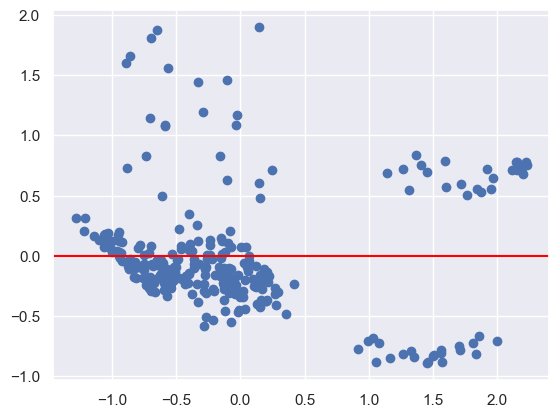

In [ ]:
# ver residuos
_ =ver_residuos(model_1, X_train_std, y_train_std, X_test_std, y_test_std)


In [ ]:
# evaluar con regressors
# guardar coeficientes
model_1.intercept_ = model_1.intercept_[0]
model_1.coef_ = model_1.coef_.reshape(-1)
# guardar test
y_test_std = y_test_std.values.reshape(-1)


# make a summary
stats.summary(model_1, X_test_std, y_test_std ,X_cols)


Residuals:
    Min      1Q  Median     3Q    Max
-1.8995 -0.1178  0.0997 0.2477 0.8901


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.000080    0.031161  -0.0026  0.997957
region_southeast -0.030030    0.036613  -0.8202  0.412836
age               0.310531    0.030530  10.1713  0.000000
region_northwest -0.011452    0.036577  -0.3131  0.754455
children          0.047769    0.032905   1.4517  0.147759
bmi               0.164200    0.031800   5.1635  0.000000
smoker_yes        0.796690    0.033052  24.1043  0.000000
region_southwest -0.035821    0.035520  -1.0085  0.314147
sex_male          0.006493    0.031064   0.2090  0.834603
---
R-squared:  0.73664,    Adjusted R-squared:  0.72847
F-statistic: 90.20 on 8 features


In [ ]:
def summarize_model(model, X_test, y_test, X_cols):
    model.intercept_ = model.intercept_[0]
    model.coef_ = model.coef_.reshape(-1)
    #y_test = y_test.values.reshape(-1)
    return stats.summary(model, X_test, y_test, X_cols)

## Entrenar con mas variables

In [ ]:
df_2 = df_one_hot_encoded.copy()
df_2['edad_al_cuadrado'] = df_2['age']**2
df_2['sobrepeso'] = (df_2['bmi'] >= 30).astype(int)
df_2['sobrepeso*fumador'] = df_2['sobrepeso']*df_2['smoker_yes']



In [ ]:
# entrenar segundo modelo
X_cols_2 = list(set(df_2.columns) - set(['charges']))
y_col_2 = ['charges']
X_2 = df_2[X_cols_2].values
y_2 = df_2[y_col_2].values

# StandardScaler
y_scaler_2 = StandardScaler()
X_scaler_2 = StandardScaler()
X_scaled_2 = X_scaler_2.fit_transform(X_2)
y_scaled_2 = y_scaler_2.fit_transform(y_2)

# train test split
rs = 23
X_train_std_2,X_test_std_2,y_train_std_2,y_test_std_2= train_test_split(X_scaled_2,y_scaled_2,train_size=0.8, random_state=rs)

model_2 = LinearRegression() #intercept = False
model_2.fit(X_train_std_2,y_train_std_2)
y_train_pred_2 = model_2.predict(X_train_std_2)

In [ ]:
#

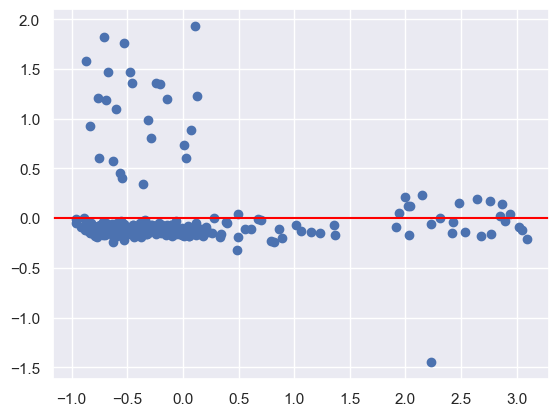

In [ ]:
# ver residuales
_ =ver_residuos(model_2, X_train_std_2, y_train_std_2, X_test_std_2, y_test_std_2)

In [ ]:
# ver analisis estadistico
model_2.intercept_ = model_2.intercept_[0]
model_2.coef_ = model_2.coef_.reshape(-1)
# guardar test
y_test_std_2 = y_test_std_2.reshape(-1)


# make a summary


AssertionError: Dimension of xlabels (8,) does not match X (267, 11).

In [ ]:
stats.summary(model_2, X_test_std_2, y_test_std_2 ,X_cols_2)

Residuals:
    Min     1Q  Median     3Q    Max
-1.9324 0.0656  0.1054 0.1417 1.4468


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept        -0.000896    0.024116  -0.0371  0.970396
region_southeast  -0.019182    0.028344  -0.6767  0.499154
sobrepeso         -0.048435    0.038926  -1.2443  0.214496
age               -0.038517    0.125956  -0.3058  0.759998
region_northwest   0.000701    0.028310   0.0248  0.980256
children           0.064696    0.025669   2.5204  0.012308
bmi                0.058580    0.037708   1.5535  0.121491
sobrepeso*fumador  0.496649    0.035568  13.9632  0.000000
smoker_yes         0.465491    0.034795  13.3779  0.000000
edad_al_cuadrado   0.363062    0.126739   2.8646  0.004508
region_southwest  -0.033194    0.027581  -1.2035  0.229852
sex_male          -0.007186    0.024043  -0.2989  0.765262
---
R-squared:  0.84282,    Adjusted R-squared:  0.83604
F-statistic: 124.30 on 11 features


## Eliminando Variables

In [ ]:
# entrenar segundo modelo
X_cols_2 = ['smoker_yes', 'edad_al_cuadrado', 'sobrepeso', 'sobrepeso*fumador','children',]
y_col_2 = ['charges']
X_2 = df_2[X_cols_2].values
y_2 = df_2[y_col_2].values

# StandardScaler
y_scaler_2 = StandardScaler()
X_scaler_2 = StandardScaler()
X_scaled_2 = X_scaler_2.fit_transform(X_2)
y_scaled_2 = y_scaler_2.fit_transform(y_2)

# train test split
rs = 23
X_train_std_2,X_test_std_2,y_train_std_2,y_test_std_2= train_test_split(X_scaled_2,y_scaled_2,train_size=0.8, random_state=rs)

model_2 = LinearRegression() #intercept = False
model_2.fit(X_train_std_2,y_train_std_2)
y_train_pred_2 = model_2.predict(X_train_std_2)

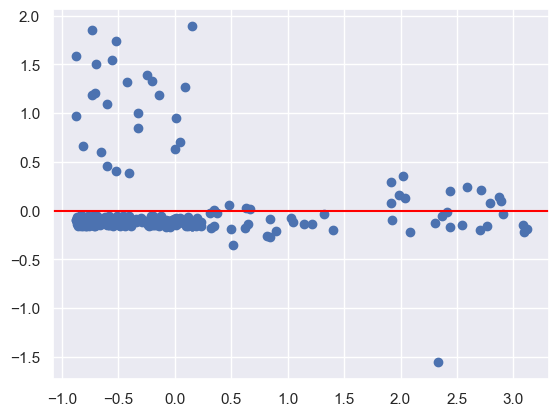

In [ ]:
_ =ver_residuos(model_2, X_train_std_2, y_train_std_2, X_test_std_2, y_test_std_2)

In [ ]:
# ver analisis estadistico
model_2.intercept_ = model_2.intercept_[0]
model_2.coef_ = model_2.coef_.reshape(-1)
# guardar test
y_test_std_2 = y_test_std_2.reshape(-1)
stats.summary(model_2, X_test_std_2, y_test_std_2 ,X_cols_2)

# make a summary

Residuals:
    Min     1Q  Median     3Q    Max
-1.8933 0.0723  0.1098 0.1335 1.5543


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept        -0.001340    0.024385  -0.0549  0.956225
smoker_yes         0.465160    0.034893  13.3309  0.000000
edad_al_cuadrado   0.328397    0.023877  13.7535  0.000000
sobrepeso         -0.006192    0.026134  -0.2369  0.812895
sobrepeso*fumador  0.496559    0.035630  13.9365  0.000000
children           0.063074    0.025723   2.4520  0.014849
---
R-squared:  0.83839,    Adjusted R-squared:  0.83530
F-statistic: 270.81 on 5 features


# Modelo Final

In [ ]:
# entrenar segundo modelo
X_cols_2 = ['smoker_yes', 'edad_al_cuadrado' , 'sobrepeso*fumador','children',]
y_col_2 = ['charges']
X_2 = df_2[X_cols_2].values
y_2 = df_2[y_col_2].values

# StandardScaler
y_scaler_2 = StandardScaler()
X_scaler_2 = StandardScaler()
X_scaled_2 = X_scaler_2.fit_transform(X_2)
y_scaled_2 = y_scaler_2.fit_transform(y_2)

# train test split
rs = 23
X_train_std_2,X_test_std_2,y_train_std_2,y_test_std_2= train_test_split(X_scaled_2,y_scaled_2,train_size=0.8, random_state=rs)

model_2 = LinearRegression(fit_intercept=False) #intercept = False
model_2.fit(X_train_std_2,y_train_std_2)
y_train_pred_2 = model_2.predict(X_train_std_2)

In [ ]:
# ver analisis estadistico
model_2.coef_ = model_2.coef_.reshape(-1)
# guardar test
y_test_std_2 = y_test_std_2.reshape(-1)
stats.summary(model_2, X_test_std_2, y_test_std_2 ,X_cols_2)

# make a summary

Residuals:
    Min     1Q  Median     3Q    Max
-1.8868 0.0741  0.1113 0.1344 1.5555


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.024276   0.0000  1.000000
smoker_yes         0.467665    0.033519  13.9522  0.000000
edad_al_cuadrado   0.327955    0.023641  13.8723  0.000000
sobrepeso*fumador  0.492792    0.033049  14.9110  0.000000
children           0.062993    0.025683   2.4527  0.014821
---
R-squared:  0.83880,    Adjusted R-squared:  0.83634
F-statistic: 340.83 on 4 features
